In [1]:
import os
from utilities import (extract_image_from_pdf, extract_xml_from_digital_pdf,
                       create_directory, read_directory_files, get_subdirectories,
                       get_string_xmltree, get_xmltree, get_specific_tags, get_page_texts_ordered,
                       get_page_text_element_attrib, get_ngram
                      )
from xml_document_info import (get_xml_info)

from box_horizontal_operations import (merge_horizontal_blocks)

import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import copy


## Draw the boxes on document pages

In [2]:
def draw_box(filepath, desired_width, desired_height, df, color="green", save=False):
    image  = Image.open(filepath)
    image  = image.resize((desired_width, desired_height))
    draw   = ImageDraw.Draw(image)
    
    for index, row in df.iterrows():
        left   = int(row['text_left'])
        right  = int(row['text_width'] + left)
        top    = int(row['text_top'])
        bottom = int(row["text_height"] + top)
        
        draw.rectangle(((left, top), (right,bottom)), outline=color)
    save_filepath = os.path.join(os.path.dirname(filepath), 'processed_' + os.path.basename(filepath))
    if save:
        image.save(save_filepath)
    
    return image

def show_df(df):
    return df.head(df.shape[0])

## start of program

In [3]:
base_dir   = '/Users/kd/Workspace/python/github/document-structure/data'
input_dir  = os.path.join(base_dir, 'input')
output_dir = os.path.join(base_dir, 'output')
filename   = '20.03.2020.pdf'


In [4]:
pdf_filepath   = os.path.join(input_dir, filename)
working_dir    = os.path.join(output_dir, os.path.splitext(filename)[0])

ret            = create_directory(working_dir)

pdf_image_dir  = extract_image_from_pdf(pdf_filepath, working_dir)
pdf_xml_dir    = extract_xml_from_digital_pdf(pdf_filepath, working_dir)

xml_files      = read_directory_files(pdf_xml_dir, pattern='*.xml')
print(xml_files, "\n\n")

image_files    = read_directory_files(pdf_image_dir, pattern='*-*.jpg')
print(image_files)

Extracted pdf images [/Users/kd/Workspace/python/github/document-structure/data/output/20.03.2020/images] 


Extracted xml of digital PDF [/Users/kd/Workspace/python/github/document-structure/data/output/20.03.2020/pdttohtml] 


['/Users/kd/Workspace/python/github/document-structure/data/output/20.03.2020/pdttohtml/20.03.2020.xml'] 


['/Users/kd/Workspace/python/github/document-structure/data/output/20.03.2020/images/20.03.20200001-01.jpg', '/Users/kd/Workspace/python/github/document-structure/data/output/20.03.2020/images/20.03.20200001-02.jpg', '/Users/kd/Workspace/python/github/document-structure/data/output/20.03.2020/images/20.03.20200001-03.jpg', '/Users/kd/Workspace/python/github/document-structure/data/output/20.03.2020/images/20.03.20200001-04.jpg', '/Users/kd/Workspace/python/github/document-structure/data/output/20.03.2020/images/20.03.20200001-05.jpg', '/Users/kd/Workspace/python/github/document-structure/data/output/20.03.2020/images/20.03.20200001-06.jpg', '/Users/kd/Wor

In [5]:
xml_dfs, page_width, page_height = get_xml_info(xml_files[0])

Total number of pages (13) in file (20.03.2020.xml)


In [6]:
document_configs = {
    'HORI_BLOCK_WDTH_DIFF_PERC': 0.85,
    'SUPERSCRIPT_HEIGHT_DIFFERENCE': 7.0,
    'HORI_SPACE_TOO_CLOSE': 10.0,
    
    'VERTICAL_SPACE_TOO_CLOSE': 5.0,
    'AVERAGE_VERTICAL_SPACE': 12.0,
    'LEFT_OR_RIGHT_ALIGNMENT_MARGIN': 20.0
}

## Vertical box merging operations

In [ ]:
def merge_vertical_blocks(df, configs, debug=False):
    df                 = in_df.copy(deep=True)
    df                 = in_df.reset_index(drop=True)
    
    connections        = []
    index_grams        = get_ngram(list(df.index.values), window_size=2)
    
    for index_gram in index_grams:
        if are_hlines(df, configs, index_gram[0], index_gram[1], debug=debug):
            connections.append((index_gram[1], index_gram[0], 'CONNECTED'))
        else:
            connections.append((index_gram[1], index_gram[0], 'NOT_CONNECTED'))

    if debug:
        print("block connections (get_document_horizontal_blocks) : %s \n----\n" % (str(connections)))
        
    grouped_lines   = arrange_grouped_line_indices(connections, debug=debug)
    cols            = df.columns.values.tolist()
    cols.append('children')
    block_df        = pd.DataFrame(columns=cols)

In [7]:
file_index = 1

img        = image_files[file_index]
df         = xml_dfs[file_index]


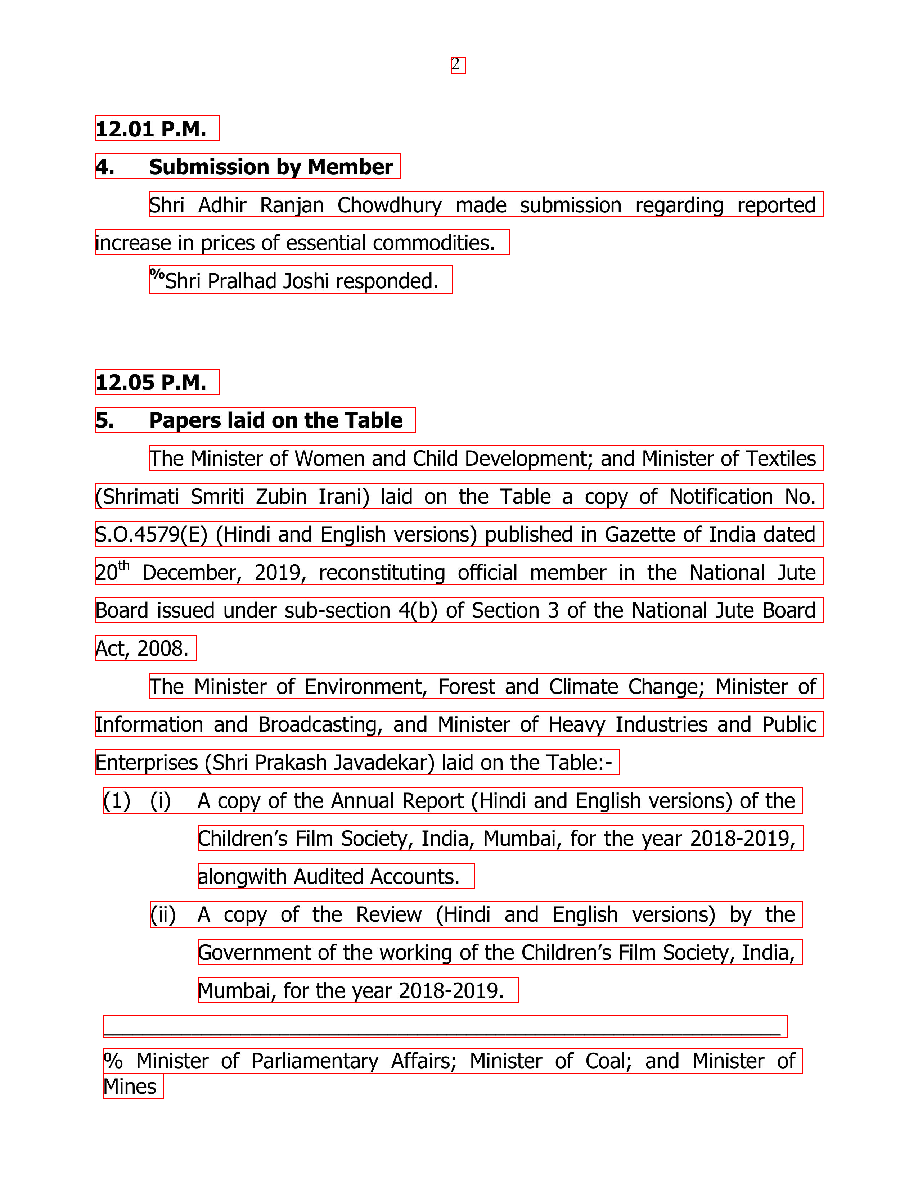

In [9]:
h_df = merge_horizontal_blocks(df, document_configs, debug=False)

draw_box(img, page_width, page_height, h_df, color='red')